<a href="https://colab.research.google.com/github/Adzz003/Netflix-Analysis/blob/main/network_analysis_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install category_encoders

In [ ]:
dataset = pd.read_csv('NData1.csv')

In [ ]:
dataset

,Unnamed: 0,Source.Port,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,L7Protocol,ProtocolName
0,0,52422,3128,6,45523,22,55,132,110414,6,6,6.000000,0.000000,4380,1187,2007.527273,768.481689,2.428355e+06,1.691453e+03,598.986842,816.061346,3880,1,45523,2167.761905,1.319385e+03,5988,698,41178,762.555556,1230.348220,5133,1,0,0,0,0,440,1100,4.832722e+02,1208.180480,6,4380,1417.333333,1121.579194,1.257940e+06,0,0,0,0,1,0,0,0,2,1435.740260,6.000000,2007.527273,440,0,0,0,0,0,0,22,132,55,110414,256,490,21,20,131,HTTP_PROXY
1,1,3128,52422,6,1,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,1.200000e+07,2.000000e+06,1.000000,0.000000,1,1,1,1.000000,0.000000e+00,1,1,0,0.000000,0.000000,0,0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,0,9.000000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,490,-1,1,20,131,HTTP_PROXY
2,2,80,38848,6,1,3,0,674,0,337,0,224.666667,194.567041,0,0,0.000000,0.000000,6.740000e+08,3.000000e+06,0.500000,0.707107,1,0,1,0.500000,7.071068e-01,1,0,0,0.000000,0.000000,0,0,1,0,0,0,96,0,3.000000e+06,0.000000,0,337,252.750000,168.500000,2.839225e+04,0,1,0,0,1,0,0,0,0,337.000000,224.666667,0.000000,96,0,0,0,0,0,0,3,674,0,0,888,-1,1,32,7,HTTP
3,3,80,38848,6,217,1,3,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,1.843318e+04,72.333333,62.660461,110,0,0,0.000000,0.000000e+00,0,0,107,53.500000,75.660426,107,0,0,0,0,0,32,96,4.608295e+03,13824.884790,0,0,0.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,3,0.000000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,3,0,888,490,0,32,7,HTTP
4,4,55961,3128,6,78068,5,0,1076,0,529,6,215.200000,286.458898,0,0,0.000000,0.000000,1.378286e+04,6.404673e+01,19517.000000,25758.502350,54313,0,78068,19517.000000,2.575850e+04,54313,0,0,0.000000,0.000000,0,0,1,0,0,0,100,0,6.404673e+01,0.000000,6,529,267.500000,286.458898,8.205870e+04,0,1,0,0,1,0,0,0,0,321.000000,215.200000,0.000000,100,0,0,0,0,0,0,5,1076,0,0,253,-1,4,20,131,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,41578,443,6,3158568,11,9,443,4642,242,0,40.272727,90.068963,2048,0,515.777778,739.400733,1.609907e+03,6.331983e+00,166240.421100,671810.715200,2939125,0,3158568,315856.800000,9.220723e+05,2939125,0,175778,21972.250000,40715.831580,108217,0,0,0,0,0,360,296,3.482591e+00,2.849393,0,2048,242.142857,530.830320,2.817808e+05,0,0,0,1,0,0,0,0,0,254.250000,40.272727,515.777778,360,0,0,0,0,0,0,11,443,9,4642,14600,243,2,32,124,YOUTUBE
496,496,44860,443,6,3314056,9,6,443,3204,242,0,49.222222,98.208678,2836,0,534.000000,1132.891522,1.100464e+03,4.526176e+00,236718.285700,7680

In [ ]:
dataset.isnull().sum()

Unnamed: 0                 0
Source.Port                0
Destination.Port           0
Protocol                   0
Flow.Duration              0
                          ..
Init_Win_bytes_backward    0
act_data_pkt_fwd           0
min_seg_size_forward       0
L7Protocol                 0
ProtocolName               0
Length: 75, dtype: int64

In [ ]:
dataset.nunique()

Unnamed: 0                 500
Source.Port                272
Destination.Port           107
Protocol                     1
Flow.Duration              428
                          ... 
Init_Win_bytes_backward    106
act_data_pkt_fwd            55
min_seg_size_forward         2
L7Protocol                  12
ProtocolName                12
Length: 75, dtype: int64

In [ ]:
dataset.shape

(500, 75)

In [ ]:
dataset.to_csv('NData.csv')

In [ ]:
dataset.head()

,Unnamed: 0,Source.Port,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,L7Protocol,ProtocolName
0,0,52422,3128,6,45523,22,55,132,110414,6,6,6.000000,0.000000,4380,1187,2007.527273,768.481689,2.428355e+06,1.691453e+03,598.986842,816.061346,3880,1,45523,2167.761905,1319.384512,5988,698,41178,762.555556,1230.348220,5133,1,0,0,0,0,440,1100,4.832722e+02,1208.18048,6,4380,1417.333333,1121.579194,1257939.887,0,0,0,0,1,0,0,0,2,1435.74026,6.000000,2007.527273,440,0,0,0,0,0,0,22,132,55,110414,256,490,21,20,131,HTTP_PROXY
1,1,3128,52422,6,1,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,1.200000e+07,2.000000e+06,1.000000,0.000000,1,1,1,1.000000,0.000000,1,1,0,0.000000,0.000000,0,0,0,0,0,0,40,0,2.000000e+06,0.00000,6,6,6.000000,0.000000,0.000,0,0,0,0,1,1,0,0,0,9.00000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,490,-1,1,20,131,HTTP_PROXY
2,2,80,38848,6,1,3,0,674,0,337,0,224.666667,194.567041,0,0,0.000000,0.000000,6.740000e+08,3.000000e+06,0.500000,0.707107,1,0,1,0.500000,0.707107,1,0,0,0.000000,0.000000,0,0,1,0,0,0,96,0,3.000000e+06,0.00000,0,337,252.750000,168.500000,28392.250,0,1,0,0,1,0,0,0,0,337.00000,224.666667,0.000000,96,0,0,0,0,0,0,3,674,0,0,888,-1,1,32,7,HTTP
3,3,80,38848,6,217,1,3,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,1.843318e+04,72.333333,62.660461,110,0,0,0.000000,0.000000,0,0,107,53.500000,75.660426,107,0,0,0,0,0,32,96,4.608295e+03,13824.88479,0,0,0.000000,0.000000,0.000,0,0,0,0,1,1,0,0,3,0.00000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,3,0,888,490,0,32,7,HTTP
4,4,55961,3128,6,78068,5,0,1076,0,529,6,215.200000,286.458898,0,0,0.000000,0.000000,1.378286e+04,6.404673e+01,19517.000000,25758.502350,54313,0,78068,19517.000000,25758.502350,54313,0,0,0.000000,0.000000,0,0,1,0,0,0,100,0,6.404673e+01,0.00000,6,529,267.500000,286.458898,82058.700,0,1,0,0,1,0,0,0,0,321.00000,215.200000,0.000000,100,0,0,0,0,0,0,5,1076,0,0,253,-1,4,20,131,HTTP_PROXY


In [ ]:
OHE_encode_coloumns = ["Source.Port", "Destination.Port", "Protocol", "L7Protocol", "ProtocolName"]

In [ ]:
encoder = ce.OneHotEncoder(cols=["Source.Port", "Destination.Port", "Protocol", "L7Protocol", "ProtocolName"])

In [ ]:
dataset = encoder.fit_transform(dataset)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
x = dataset.iloc[:,:-12]
y = dataset.iloc[:,-12:]


In [ ]:
x


,Unnamed: 0,Source.Port_1,Source.Port_2,Source.Port_3,Source.Port_4,Source.Port_5,Source.Port_6,Source.Port_7,Source.Port_8,Source.Port_9,Source.Port_10,Source.Port_11,Source.Port_12,Source.Port_13,Source.Port_14,Source.Port_15,Source.Port_16,Source.Port_17,Source.Port_18,Source.Port_19,Source.Port_20,Source.Port_21,Source.Port_22,Source.Port_23,Source.Port_24,Source.Port_25,Source.Port_26,Source.Port_27,Source.Port_28,Source.Port_29,Source.Port_30,Source.Port_31,Source.Port_32,Source.Port_33,Source.Port_34,Source.Port_35,Source.Port_36,Source.Port_37,Source.Port_38,Source.Port_39,...,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,L7Protocol_1,L7Protocol_2,L7Protocol_3,L7Protocol_4,L7Protocol_5,L7Protocol_6,L7Protocol_7,L7Protocol_8,L7Protocol_9,L7Protocol_10,L7Protocol_11,L7Protocol_12
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.257940e+06,0,0,0,0,1,0,0,0,2,1435.740260,6.000000,2007.527273,440,0,0,0,0,0,0,22,132,55,110414,256,490,21,20,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.000000e+00,0,0,0,0,1,1,0,0,0,9.000000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,490,-1,1,20,1,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2.839225e+04,0,1,0,0,1,0,0,0,0,337.000000,224.666667,0.000000,96,0,0,0,0,0,0,3,674,0,0,888,-1,1,32,0,1,0,0,0,0,0,0,0,0,0,0
3,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.000000e+00,0,0,0,0,1,1,0,0,3,0.000000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,3,0,888,490,0,32,0,1,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8.205870e+04,0,1,0,0,1,0,0,0,0,321.000000,215.200000,0.000000,100,0,0,0,0,0,0,5,1076,0,0,253,-1,4,20,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2.817808e+05,0,0,0,1,0,0,0,0,0,254.250000,40.272727,515.777778,360,0,0,0,0,0,0,11,443,9,4642,14600,243,2,32,0,0,0,0,0,1,0,0,0,0,0,0
496,496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4.930553e+05,0,0,0,1,0,0,0,0,0,243.133333,49.222222,534.000000,296,0,0,0,0,0,0,9,443,6,3204,14600,349,2,32,0,0,0,0,0,1,0,0,0,0,0,0
497,497,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.944397e+05,0,0,0,1,0,0,0,0,4,181.275862,136.666667,190.569444,312,0,0,0,0,0,0,15,2050,72,13721,8192,324,14,20,0,0,0,0,1,0,0,0,0,0,0,0
498,498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2.452757e+05,0,0,0,1,0,0,0,0,4,218.588235,189.600000,224.444444,412,0,0,0,0,0,0,20,3792,99,22220,8192,397,19,20,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
y

,ProtocolName_1,ProtocolName_2,ProtocolName_3,ProtocolName_4,ProtocolName_5,ProtocolName_6,ProtocolName_7,ProtocolName_8,ProtocolName_9,ProtocolName_10,ProtocolName_11,ProtocolName_12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,1,0,0,0,0,0,0
496,0,0,0,0,0,1,0,0,0,0,0,0
497,0,0,0,0,1,0,0,0,0,0,0,0
498,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [ ]:
scaler=StandardScaler()
scaler.fit(xtrain)
xtrain=scaler.transform(xtrain)
xtest=scaler.transform(xtest)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(xtest)

In [ ]:
xtest[0]

array([-1.08063739, -0.05006262, -0.6352234 , -0.08692914, -0.05006262,
       -0.05006262, -0.05006262,  4.24824894, -0.05006262, -0.05006262,
       -0.05006262,  0.        , -0.05006262, -0.05006262, -0.05006262,
       -0.05006262, -0.07088812, -0.05006262,  0.        , -0.05006262,
       -0.05006262, -0.05006262, -0.07088812, -0.07088812, -0.05006262,
       -0.05006262, -0.05006262, -0.07088812, -0.05006262, -0.07088812,
       -0.05006262, -0.05006262,  0.        , -0.05006262, -0.05006262,
        0.        , -0.05006262, -0.05006262, -0.05006262, -0.05006262,
       -0.05006262,  0.        , -0.05006262, -0.05006262, -0.05006262,
        0.        , -0.05006262, -0.05006262, -0.05006262, -0.05006262,
       -0.05006262, -0.05006262, -0.05006262, -0.05006262, -0.07088812,
       -0.05006262, -0.05006262,  0.        , -0.05006262, -0.05006262,
       -0.05006262, -0.07088812, -0.07088812, -0.07088812, -0.05006262,
       -0.05006262, -0.05006262, -0.05006262, -0.07088812, -0.07

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(ytest,y_pred))
print(mean_absolute_error(ytest,y_pred))

0.08916666666666667
0.08916666666666667


In [ ]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(
    ytest.values.argmax(axis=1), y_pred.argmax(axis=1))



In [ ]:
conf

array([[ 2, 13,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  7,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  7,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0, 14,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  2,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [ ]:
from sklearn.metrics import plot_confusion_matrix

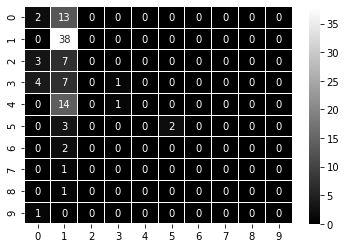

In [ ]:
sns.heatmap(conf,
            cmap = 'gray',
            linecolor = 'white',
            linewidths = 0.01,
            annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.07      0.12        15
           1       0.44      1.00      0.61        38
           2       0.00      0.00      0.00        10
           3       0.50      0.08      0.14        12
           4       0.00      0.00      0.00        15
           5       1.00      0.40      0.57         5
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1

   micro avg       0.46      0.42      0.44       100
   macro avg       0.25      0.13      0.12       100
weighted avg       0.43      0.42      0.30       100
 samples avg       0.42      0.42      0.42       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.neural_network import MLPRegressor

In [ ]:
modelLR=LinearRegression()
modelNN=MLPRegressor()

In [ ]:
modelLR.fit(xtrain,ytrain)
modelNN.fit(xtrain,ytrain)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
print(modelLR.score(xtest,ytest))
print(modelNN.score(xtest,ytest))

0.8668628177643779
-0.2382533449731072


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
LRpred=modelLR.predict(xtest)
NNpred=modelNN.predict(xtest)

In [ ]:
print(mean_squared_error(LRpred,ytest))
print(mean_squared_error(NNpred,ytest))

0.00868929122678373
0.09009879793401994


In [ ]:
pip install nbmerge

  Created wheel for nbmerge: filename=nbmerge-0.0.4-py2.py3-none-any.whl size=6406 sha256=287bec0ba8430ff28a032ae3ce2b9cf6e41572c673d61e643602cb873ad9f928
  Stored in directory: /root/.cache/pip/wheels/93/0c/59/ac91905c182ce43c4f39a50b5381c9485049cfe913237872ff
Successfully built nbmerge
